In [1]:
# Wavefunction generation
from pyscf import mcscf, fci, lib 
from pyscf import gto, scf, tools, dft
from pyscf.dft import numint
import api as pyq 
import matplotlib.pyplot as plt
import importlib
import os
import h5py
import pdb
import pyscf
import numpy as np
from pyscf.scf.hf import dump_scf_summary
print(pyq.__file__)
print(pyscf.__file__)

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/usr/local/anaconda3/lib/python3.9/site-packages/pyscf/__init__.py


In [2]:
mol = gto.M(atom="H 0. 0. 0.", spin=1,basis=f'ccecpccpvtz', unit='bohr')
mf = dft.UKS(mol)
# mf.verbose=6
scf_checkfile = "lda.hdf5"
dm = mf.init_guess_by_atom()
mf.kernel(dm, xc='LDA,VWN')


converged SCF energy = -0.478333700136577  <S^2> = 0.75  2S+1 = 2


-0.47833370013657667

In [3]:
dm = mf.make_rdm1()
kin = mf.mol.intor_symmetric('int1e_kin')
ein = mf.mol.intor_symmetric('int1e_nuc')
j, k= mf.get_jk(mf.mol, dm)

In [4]:
mf.scf_summary

{'e1': -0.4987960255726221,
 'coul': 0.2990312848028822,
 'exc': -0.2785689593668368,
 'nuc': 0}

In [5]:
size = 1000
pos = np.zeros((size, 3))
for i in range(3):
    pos[:,i] = np.random.normal(0, 2, size)
ao_value = numint.eval_ao(mol, pos)
r = np.linalg.norm(pos, axis=1)
ao_value.shape


(1000, 14)

In [6]:
ki = np.einsum('ij,jk,ki->i', ao_value, kin, ao_value.T)
eii = np.einsum('ij,jk,ki->i', ao_value, ein, ao_value.T)
rho = np.einsum('ij,jk,ki->i', ao_value, dm[0], ao_value.T)

In [7]:
eie = np.einsum('ij,jk,ki,jk->i', ao_value, ein, ao_value.T, dm[0]).real

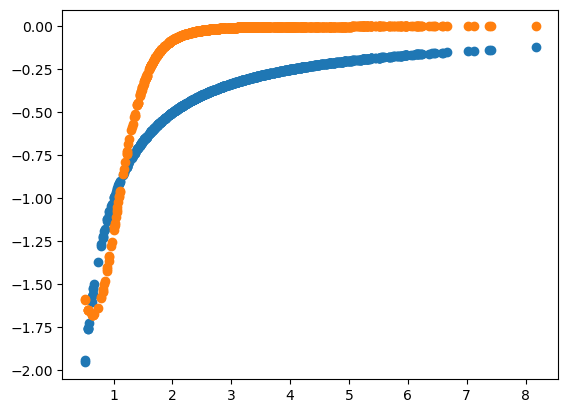

In [8]:
plt.scatter(r, -1./r)
# plt.scatter(r, eii)
# plt.scatter(r, eie)
plt.scatter(r, eii)

In [9]:
mol.set_rinv_orig_([0,0,0])
Vele = np.einsum('ij,ij->ij', mol.intor('int1e_rinv'), dm[0])
Veii = np.einsum('ij,jk,ki->i', ao_value, -Vele, ao_value.T)

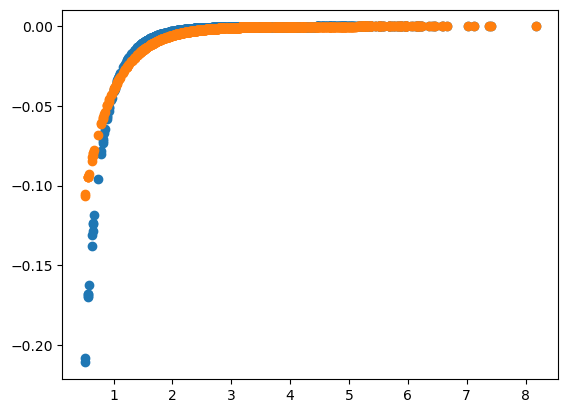

In [10]:
plt.scatter(r, -1./r*rho)
# plt.scatter(r, eii)
# plt.scatter(r, eie)
plt.scatter(r, Veii)